In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.7 MB/s eta 0:01:26
   ---------------------------------------- 0.2/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 0.4/150.0 MB 3.3 MB/s eta 0:00:46
   ---------------------------------------- 0.6/150.0 MB 3.2 MB/s eta 0:00:48
   ---------------------------------------- 0.8/150.0 MB 3.7 MB/s eta 0:00:41
   ---------------------------------------- 1.0/150.0 MB 3.8 MB/s eta 0:00:39
   ---------------------------------------- 1.3/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.6/150.0 MB 4.3 MB/s eta 0:00:35
   ---------------------------------------- 1.8/150.0 MB 4.5 MB/s eta 0:00:33
    --------------------------------------- 2.1/150.0 MB 4.7 MB/s eta 0:00:32
    --------------------------------------- 2.3/150.0 MB 4.7 MB/s eta 0:00:32
    --------------------------------------- 2.6/150.0 MB 4.8 MB/s eta 0

In [3]:
df1 = pd.read_csv('train.csv')
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df2 = pd.read_csv('test.csv')
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
df3 = pd.read_csv('sample_submission.csv')
df3

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


# EDA

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df1.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].fillna('Unknown')
    else:
        # Choose one: median, mean, or mode
        df1[col] = df1[col].fillna(df1[col].median())
        # df1[col] = df1[col].fillna(df1[col].mean())
        # df1[col] = df1[col].fillna(df1[col].mode()[0])


In [9]:
print(df1.isnull().sum())
print(df1.info())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 no

# No of catagories for each catagory columns

In [10]:
cat_cols = df1.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col}: {df1[col].nunique()} unique categories")


PassengerId: 8693 unique categories
HomePlanet: 4 unique categories
CryoSleep: 3 unique categories
Cabin: 6561 unique categories
Destination: 4 unique categories
VIP: 3 unique categories
Name: 8474 unique categories


In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df1.copy()
label_encoders = {}
cat_cols = df_encoded.select_dtypes(include='object').columns
cat_cols = [col for col in cat_cols if col != 'PassengerId']

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  
    label_encoders[col] = le


In [12]:
print(df_encoded)
print(label_encoders)

     PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0        0001_01           1          0    149            2  39.0    0   
1        0002_01           0          0   2184            2  24.0    0   
2        0003_01           1          0      1            2  58.0    1   
3        0003_02           1          0      1            2  33.0    0   
4        0004_01           0          0   2186            2  16.0    0   
...          ...         ...        ...    ...          ...   ...  ...   
8688     9276_01           1          0    146            0  41.0    1   
8689     9278_01           0          1   5280            1  18.0    0   
8690     9279_01           0          0   5285            2  26.0    0   
8691     9280_01           1          0   2131            0  32.0    0   
8692     9280_02           1          0   2131            2  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0             0.0        0.0   

# Extracting Training data

In [13]:
X_train = df_encoded.drop(columns=['Transported','PassengerId'])
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8320
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,3524
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,4780
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,3002
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1596


In [14]:
X_train.corr()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
HomePlanet,1.000000,0.068726,-0.425569,0.042618,0.122943,0.044255,0.192189,0.056321,0.088970,0.045252,0.035631,0.027201
CryoSleep,0.068726,1.000000,0.100689,-0.085571,-0.068816,-0.023407,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721,-0.001357
Cabin,-0.425569,0.100689,1.000000,0.113260,-0.236994,-0.053158,-0.073802,-0.260056,-0.067709,-0.180768,-0.210865,0.013680
Destination,0.042618,-0.085571,0.113260,1.000000,-0.004342,-0.024905,0.043735,-0.109558,0.022982,-0.052915,-0.072850,0.001428
Age,0.122943,-0.068816,-0.236994,-0.004342,1.000000,0.032434,0.068629,0.127390,0.033148,0.120946,0.099590,-0.014883
VIP,0.044255,-0.023407,-0.053158,-0.024905,0.032434,1.000000,0.038011,0.054756,-0.009496,0.020355,0.054623,-0.010074
RoomService,0.192189,-0.216689,-0.073802,0.043735,0.068629,0.038011,1.000000,-0.015126,0.052337,0.009244,-0.018624,0.021337
FoodCourt,0.056321,-0.182029,-0.260056,-0.109558,0.127390,0.054756,-0.015126,1.000000,-0.013717,0.221468,0.224572,-0.019957
ShoppingMall,0.088970,-0.188532,-0.067709,0.022982,0.033148,-0.009496,0.052337,-0.013717,1.000000,0.014542,-0.007849,-0.008388
Spa,0.045252,-0.178382,-0.180768,-0.052915,0.120946,0.020355,0.009244,0.221468,0.014542,1.000000,0.147658,-0.028604


In [15]:
y_train = df_encoded['Transported']
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [16]:
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].fillna('Unknown')
    else:
        # Choose one: median, mean, or mode
        df2[col] = df2[col].fillna(df2[col].median())
        # df1[col] = df1[col].fillna(df1[col].mean())
        # df1[col] = df1[col].fillna(df1[col].mode()[0])

X_test = df2
cat_cols = X_test.select_dtypes(include='object').columns
cat_cols = [col for col in cat_cols if col != 'PassengerId']

for col in cat_cols:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col].astype(str))  
    label_encoders[col] = le
X_test = X_test.drop(columns=['PassengerId'])

<Axes: >

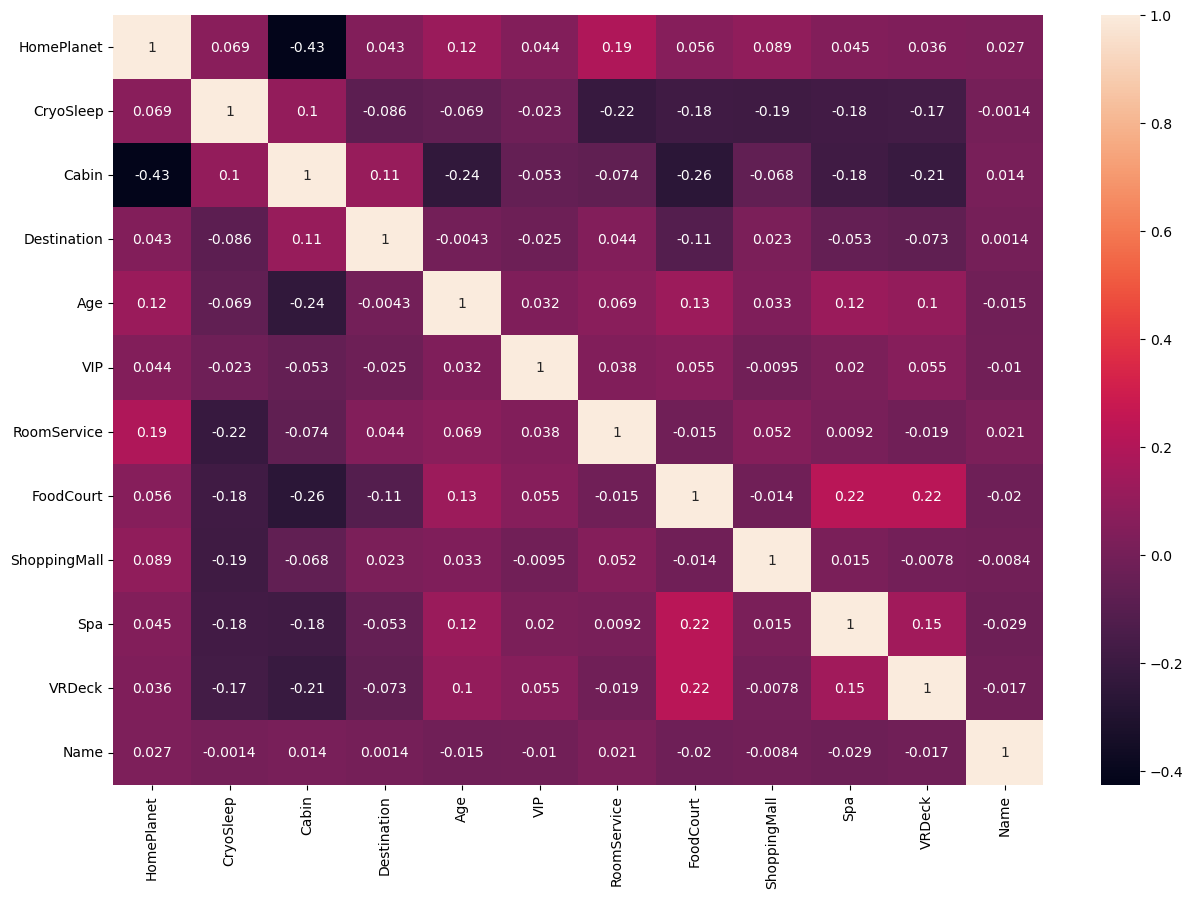

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Bag_clf' : BaggingClassifier(),
    'D_tree' : DecisionTreeClassifier(),
    'Xg_boost' : XGBClassifier()
}

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train1, y_train1)
    # Predict on test data
    y_pred = model.predict(X_test1)
    
    # Calculate metrics
    acc = accuracy_score(y_test1, y_pred)
    prec = precision_score(y_test1, y_pred, zero_division=0)
    rec = recall_score(y_test1, y_pred, zero_division=0)
    f1 = f1_score(y_test1, y_pred, zero_division=0)
    f2 = fbeta_score(y_test1, y_pred, beta=2, zero_division=0)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'F2 Score': f2
    })

import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0    Gradient Boosting  0.792178   0.765914  0.848370  0.805036  0.830488
1        Random Forest  0.786426   0.789514  0.787718  0.788615  0.788076
2             Xg_boost  0.782209   0.779182  0.794541  0.786787  0.791421
3                  SVM  0.774923   0.720217  0.907506  0.803086  0.862641
4              Bag_clf  0.768021   0.793586  0.731615  0.761341  0.743222
5  Logistic Regression  0.765337   0.745657  0.813495  0.778100  0.798958
6  K-Nearest Neighbors  0.748466   0.731656  0.793783  0.761455  0.780528
7        Decision Tree  0.730445   0.730539  0.739955  0.735217  0.738052
8               D_tree  0.728528   0.727815  0.739955  0.733835  0.737494
9          Naive Bayes  0.697086   0.635433  0.940864  0.758557  0.858348


In [21]:
best_params = {
    'subsample': 0.8,
    'n_estimators': 1000,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_depth': 50,
    'learning_rate': 0.01,
}

 
final_model = GradientBoostingClassifier(**best_params)
final_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=50, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=1000,
                           subsample=0.8)

In [29]:
 y_final_pred = final_model.predict(X_test)
 y_pred = final_model.predict(X_test1)
 print(accuracy_score(y_test1, y_pred))
 prec = precision_score(y_test1, y_pred, zero_division=0)
 rec = recall_score(y_test1, y_pred, zero_division=0)
 f1 = f1_score(y_test1, y_pred, zero_division=0)
 f2 = fbeta_score(y_test1, y_pred, beta=2, zero_division=0)
 

1.0


In [30]:
column = df2['PassengerId']
combined = np.column_stack((column,y_final_pred))
df_result = pd.DataFrame(combined, columns=['PassengerId', 'Transported'])
df_result.to_csv('spaceship_submission.csv',index=False)

In [24]:
df_result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.5, 1, 2, 5],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],   
    'reg_lambda': [0.1, 0.5, 1, 5, 10],  
}


grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,   
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 390625 candidates, totalling 1171875 fits
